# Nuages de mots

## Imports et stopwords

In [40]:
from collections import Counter

from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

from IPython.display import Image

from collections import defaultdict
import sys
import spacy

from spacy.lang.fr.examples import sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["afin", "aie", "ai", "ainsi", "allaient", "après", "au", "aux", "aussi", "auquel", "aura", "auront",
       "aux", "auxquels", "auxquelles", "avaient", "avais", "avait", "avec", "avoir", "ayant",
       "bien",
       "ça", "ceci", "cela", "celle", "celle-ci", "celle-là", "celui", "celui-ci", "celui-là", "cependant", "ces", "cet", "cette", 
       "ceux", "ceux-çi", "ceux-là", "chacun", "chaque", "chez", 
       "comme", "comment", "contre",
       "dans", "de", "delà", "depuis", "des", "dès", "desquels", "desquelles", "dire", "dit", "doit", "donc", "dont", "du", "duquel", "durant",
       "en", "encore", "entre", "environ", "est", "es", "étant", "être", "etc", 
       "faire", "fait", "faut", "feront", "font",
       "het",
       "ils",
       "jusqu", "jusque",
       "là", "la", "laquelle", "le", "lequel", "les", "lesquels", "lesquelles", "leur", "leurs", "lorsque", "lui",
       "mais", "malgré", "même", "mes", "mien", "miennes", "moins",
       "néanmoins", "non", "nos", "notre", "nôtre",
       "où", "ou", "outre",
       "parmi", "pas", "pendant", "peu", "peut", "plus",
       "quel", "quelle", "quelles", "quels", "quelques",
       "sans", "sauf", "se", "selon", "ses", "sous", "sur",
       "tel", "telle", "tels", "telles", "tien", "tienne", "tous", "tout", "toute", "toutes", "très", "trois",
       "une", "un",
       "van", "vers","vos", "vôtre", "vôtres"
       
       #sw for all contexts:
       # déterminants et pronoms
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "laquelle", "lequel", 
       "le", "leurs", "les", "plusieurs", "quelques", "toutes",

       # abréviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp", "enfts",

       # divers
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi", "quand",

       #//////////////////////////////////////////////////////////////////////////
       
       #sw by specific contexts:
       # météo et temporalité
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi",

       #immobilier petites annonces
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine", "appts",

       # villes et lieux belges
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", 

       #job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
       
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [42]:
# Choisir une année
year = 1969

In [43]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1969-08-14_01-00024.txt',
 'KB_JB838_1969-11-22_01-00033.txt',
 'KB_JB838_1969-02-16_01-00031.txt',
 'KB_JB838_1969-02-27_01-00032.txt',
 'KB_JB838_1969-07-12_01-00020.txt',
 'KB_JB838_1969-04-29_01-00016.txt',
 'KB_JB838_1969-11-04_01-00014.txt',
 'KB_JB838_1969-03-19_01-00003.txt',
 'KB_JB838_1969-11-21_01-00010.txt',
 'KB_JB838_1969-12-09_01-00022.txt',
 'KB_JB838_1969-05-21_01-00026.txt',
 'KB_JB838_1969-02-05_01-00021.txt',
 'KB_JB838_1969-08-02_01-00007.txt',
 'KB_JB838_1969-04-29_01-00007.txt',
 'KB_JB838_1969-07-20_01-00005.txt',
 'KB_JB838_1969-08-21_01-00014.txt',
 'KB_JB838_1969-03-18_01-00014.txt',
 'KB_JB838_1969-05-22_01-00017.txt',
 'KB_JB838_1969-03-28_01-00005.txt',
 'KB_JB838_1969-08-10_01-00017.txt',
 'KB_JB838_1969-02-22_01-00011.txt',
 'KB_JB838_1969-10-28_01-00008.txt',
 'KB_JB838_1969-04-09_01-00026.txt',
 'KB_JB838_1969-04-12_01-00007.txt',
 'KB_JB838_1969-04-02_01-00021.txt',
 'KB_JB838_1969-10-24_01-00026.txt',
 'KB_JB838_1969-05-29_01-00013.txt',
 

In [44]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [45]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [46]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'Ets VANDEN BOUDE s.a. *700, chaussée de Mons Anderlectit * Bruxelles 7 demandent : ELECTRICIENS QUALIFIES (installation basse tension) PLOMBIERS . sachant conduire si possible MAGASINIERS (pour dépôt '

In [47]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../tp2'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [48]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'Ets VANDEN BOUDE s.a. *700, chaussée de Mons Anderlectit * Bruxelles 7 demandent : ELECTRICIENS QUALIFIES (installation basse tension) PLOMBIERS . sachant conduire si possible MAGASINIERS (pour dépôt rue de la Roue) Place stable et d’avenir dans une firme en » continuelle expansion. Bonne rémunération. Prière de s’adresser au « Service du Personnel », av. Doct. Zamenhof - Anderlecht-Veeweyde - Tél. 23.00.80 (poste 34) - Autobus 46 - Trams : A - H - L - Z. 370879 A n « *♦ 44 H 44 44 | H H iî 8 s '

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [49]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [50]:
clean_text(year, folder=temp_path)

'Output has been written in ../tp2/1969_clean.txt!'

In [51]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'ets vanden boude anderlectit demandent electriciens qualifies installation basse tension plombiers sachant conduire possible magasiniers dépôt roue stable avenir firme continuelle expansion rémunération prière adresser personnel doct zamenhof veeweyde poste autobus trams ets vanderborght frères engagent aides magasiniers préparation commandes bons salaires semaines pension extra légale gratuite personnel fossé loups ateliers ruisbroek decolleteur revolver aide verificateur tourneurs manœuvres ma'

## Nuage de mots

### Afficher les termes les plus fréquents


In [52]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('mars', 221), ('premier', 205), ('partir', 172), ('division', 166), ('importante', 165), ('firme', 161), ('grande', 161), ('partie', 160), ('première', 160), ('aide', 159)]


### Créer, stocker et afficher le nuage de mots

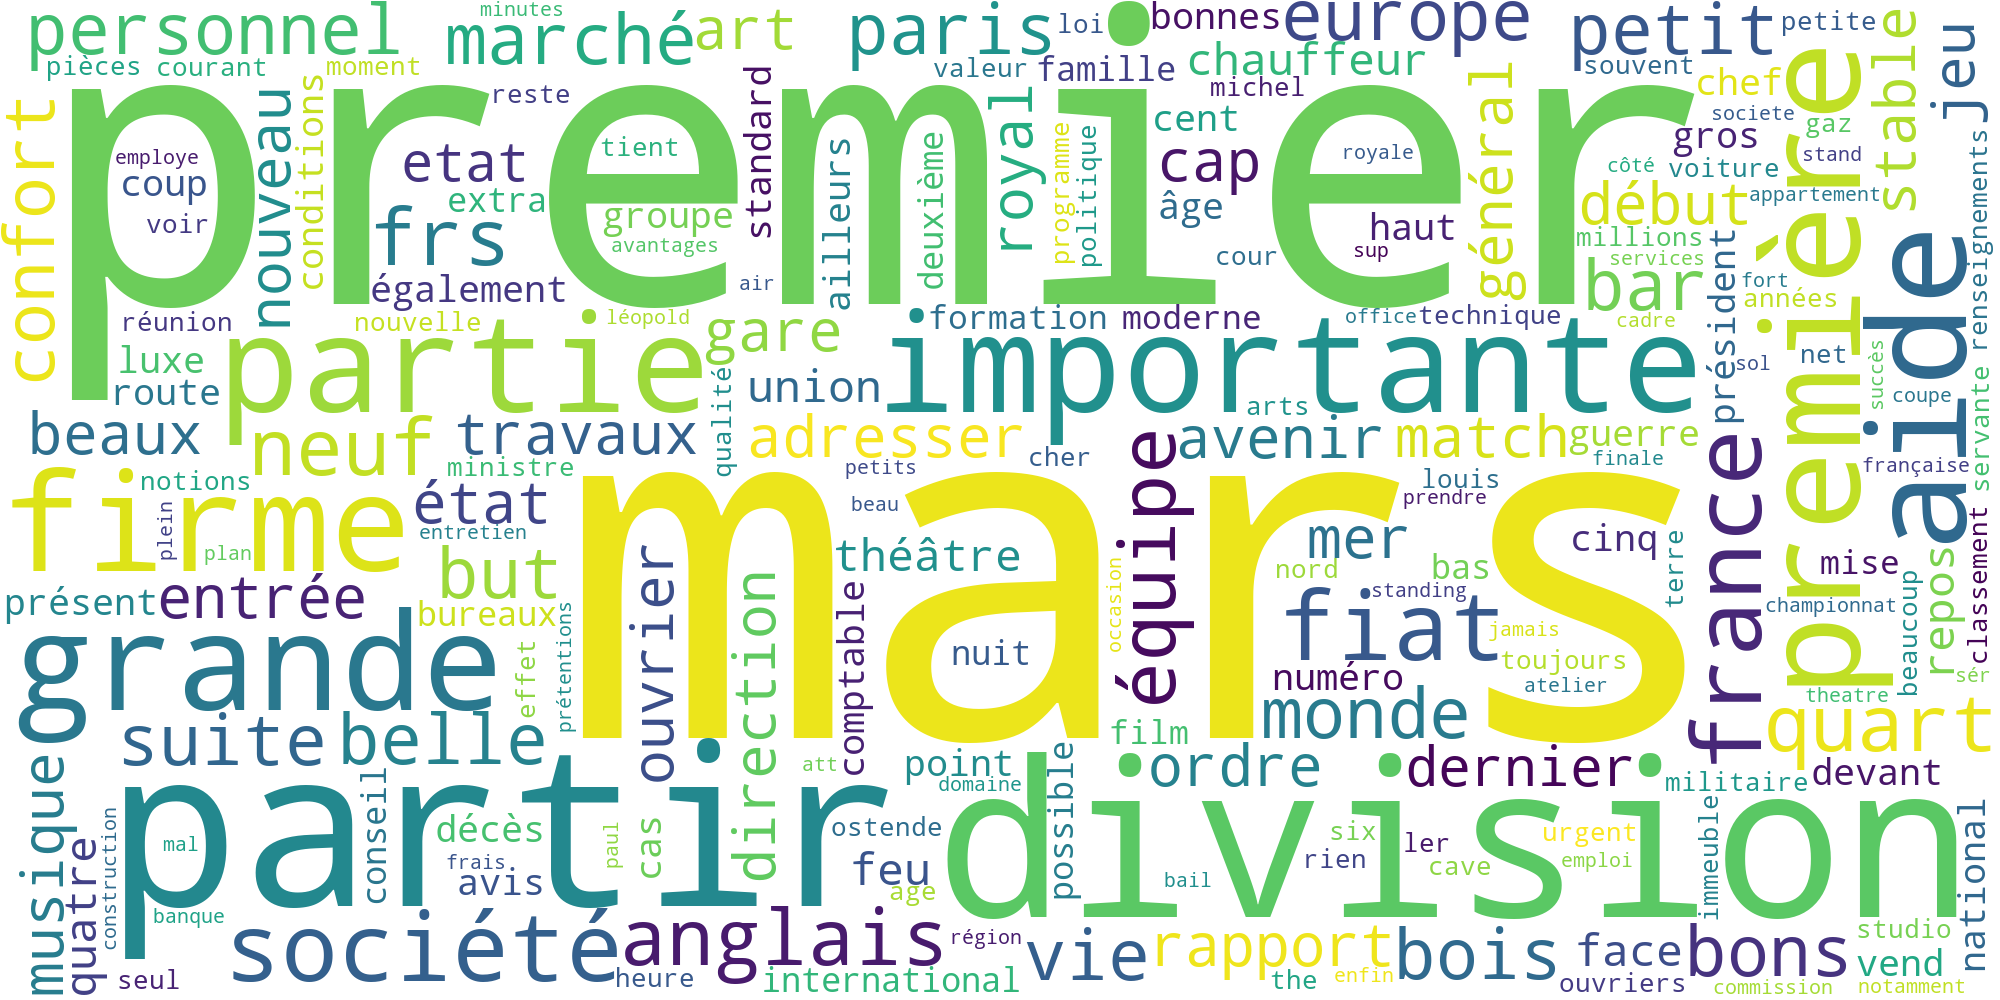

In [53]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [54]:
# Isoler la première phrase
sent = sentences[0]
sent

'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars'

In [55]:
nlp = spacy.load('fr_core_news_md')

In [56]:
# Charger le texte
n=1000000
text = open("../tp2/1969_clean.txt", encoding='utf-8').read()[:n]

In [57]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 32 s, sys: 1.25 s, total: 33.3 s
Wall time: 33.6 s


In [82]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [83]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_location = sorted(location.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:15]:
    print(f" {person} apparait {freq} fois dans le corpus")

for location, freq in sorted_location[:15]:
    print(f" {location} apparait {freq} fois dans le corpus")

for organisation, freq in sorted_organisation[:15]:
    print(f" {organisation} apparait {freq} fois dans le corpus")

 paula apparait 16 fois dans le corpus
 général gaulle apparait 15 fois dans le corpus
 jeremy apparait 14 fois dans le corpus
 atel apparait 13 fois dans le corpus
 martin apparait 11 fois dans le corpus
 guimard apparait 10 fois dans le corpus
 beerschot apparait 8 fois dans le corpus
 eddy merckx apparait 7 fois dans le corpus
 léon frédéricq apparait 6 fois dans le corpus
 bradley apparait 6 fois dans le corpus
 etrimo apparait 5 fois dans le corpus
 harmel apparait 5 fois dans le corpus
 genappe apparait 5 fois dans le corpus
 gilson apparait 5 fois dans le corpus
 raymond goethals apparait 5 fois dans le corpus
 paris apparait 45 fois dans le corpus
 europe apparait 44 fois dans le corpus
 france apparait 41 fois dans le corpus
 espagne apparait 20 fois dans le corpus
 allemagne apparait 18 fois dans le corpus
 italie apparait 17 fois dans le corpus
 londres apparait 15 fois dans le corpus
 angleterre apparait 15 fois dans le corpus
 rome apparait 12 fois dans le corpus
 moscou a